# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [11]:
# Import your libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [5]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/home/alfonso/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (1.2256825593685292, 0.5418092484136116)
1     (2.544313595943485, 0.28022657741989393)
2    (9.778111782336518, 0.007528526869512264)
3     (0.9359929453265795, 0.6262557326684958)
4    (1.8364565440891245, 0.39922573425954466)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here

# Según los datos obtenidos, el 3er test rechaza que siga una distribución normal.
# En los otros datos no podemos rechazar nada

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

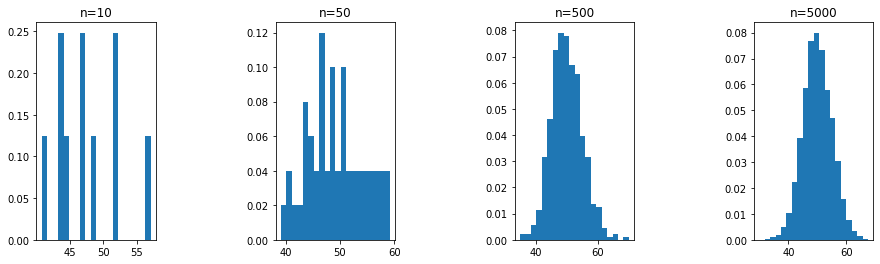

In [13]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Según Wikipedia: *si Sn es la suma de n variables aleatorias independientes y de varianza no nula pero finita, entonces la función de distribución de Sn «se aproxima bien» a una distribución normal (también llamada distribución gaussiana, curva de Gauss o campana de Gauss). Así pues, el teorema asegura que esto ocurre cuando la suma de estas variables aleatorias e independientes **es lo suficientemente grande**.*

Por tanto, se observa que en cuanto mayor es el tamaño de las muestras y como se observa en las gráfica, más aproxima a una distirbución normal.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

In [ ]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

Vemos que la probabilidad de que nadie le de es la más alta, (ya que la probabilidad de que uno de click es tan solo de 0.15). En cambio, la probabilidad de que los 5 den click es lo más baja. Por ello, la gráfica va descendiendo de mayor a menor probabilidad.

#### Now plot PMP with 50, 500, and 5000 visitors.

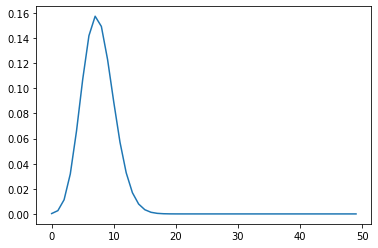

In [16]:
# Your code here

n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

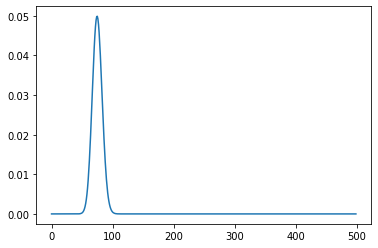

In [17]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

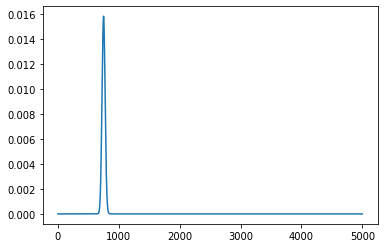

In [18]:
n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

El pico de cada uno de los gráficos ocurre alrededor de p=0.15 de la muestra. Es decir, para el n=5000, los más probable es que hagan click 750 personas (si el evento se repitiera infinitas veces, de media harían click 750 personas) o un valor cercano. Por ello, la probabilidad tiene una PMF con un pico cercano a este valor.

De la misma forma, a mayor n, menor es la posibilidad de que nadie haga click, por ello dicho pico se aleja de 0.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

La distribución de Poisson se utiliza para representar eventos aleatorios a lo largo del tiempo.

Te devuelve la probabilidad de que ocurran k eventos dentro de un período de tiempo establecido y sabiendo la media de eventos totales que ocurren en el tiempo.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [20]:
# Your code here

from scipy.stats import poisson

poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [21]:
# Your code here
poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

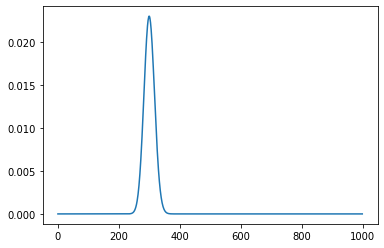

In [22]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)